<a href="https://colab.research.google.com/github/hasnainsubhani/DeepLearning/blob/main/Cat_and_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
from google.colab import drive

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/cat-dog-data.zip", 'r')
zip_ref.extractall("/content/data")
zip_ref.close()

In [59]:
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.image import imread
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Flatten, BatchNormalization, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import tqdm
import shutil

In [3]:
import argparse
from pathlib import Path

In [4]:
physical_device = tf.config.experimental.list_physical_devices('GPU')
print("Num GPU Avilibale: ", len(physical_device))
tf.config.experimental.set_memory_growth(physical_device[0],True)

Num GPU Avilibale:  1


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
base = '/content/data/PetImages'
train = os.path.join(base,'train')

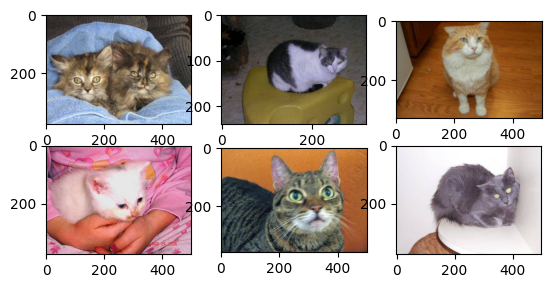

In [7]:
folder = base + '/Cat/' # Define the location
j=0
for i in range(900,906):
    plt.subplot(330 + 1 + j) # Define the subplot
    filename = folder + 'cat.' + str(i) + '.jpg' # get the filename
    #print(filename)
    image = imread(filename) # image pixels
    plt.imshow(image) # plot the row pixel data
    j= j+1


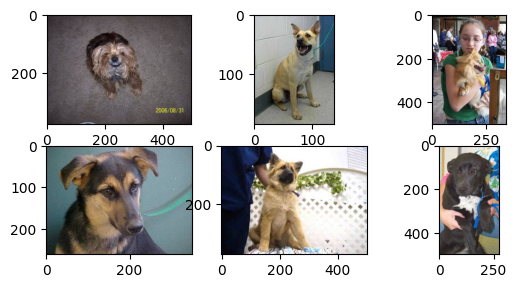

In [8]:
folder = base + '/Dog/' # Define the location
j=0
for i in range(860,866):
    plt.subplot(330 + 1 + j) # Define the subplot
    filename = folder + 'dog.' + str(i) + '.jpg' # get the filename
    #print(filename)
    image = imread(filename) # image pixels
    plt.imshow(image) # plot the row pixel data
    j= j+1

In [9]:
all_train_Cat = os.listdir(base + '/Cat/')
all_train_Dog = os.listdir(base + '/Dog/')
all_train_Dog = all_train_Dog[:200]
print('Num of images:', len(all_train_Cat) ,',', len(all_train_Dog))

Num of images: 199 , 200


In [10]:
dog_file = [i for i in all_train_Dog if i.startswith('dog')]
cat_file = [i for i in all_train_Cat if i.startswith('cat')]

In [11]:
data = train_test_split(dog_file,cat_file,test_size = 0.1,shuffle = True,random_state = 42)
train_dog,valid_dog,train_cat,valid_cat = [x for x in data]

In [12]:

train_dog_total,valid_dog_total,train_cat_total,valid_cat_total = [len(x) for x in data]
print("All train data: " + str(train_dog_total + train_cat_total))
print("All valid data: " + str(valid_dog_total + valid_cat_total))

All train data: 350
All valid data: 40


In [13]:
print(len(train_dog))
print(len(valid_dog))
print(len(train_cat))
print(len(valid_cat))

175
20
175
20


In [14]:
train_dog_dir = train + '/dog'
train_cat_dir = train + '/cat'
valid = base + '/valid'
valid_dog_dir = valid + '/dog'
valid_cat_dir = valid + '/cat'

In [15]:


make_dirs = [train_dog_dir, valid_dog_dir,train_cat_dir, valid_cat_dir]
for dir, x in zip(make_dirs, data):
    #print(dir,'  ',x)
    os.makedirs(dir, exist_ok=True)
    if dir[-4:] == '/dog':
      _pet = '/Dog'
    else:
      _pet = '/Cat'

    for i in tqdm.tqdm(x):
        print(os.path.join(os.path.join(base + _pet, i)),'   ', dir)
        if os.path.exists(os.path.join(base + _pet, i)):
          shutil.move(os.path.join(base + _pet, i), dir)
    print('elements in {}: {}'.format(dir, len(os.listdir(dir))))



100%|██████████| 175/175 [00:00<00:00, 864.71it/s]


/content/data/PetImages/Dog/dog.2420.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.884.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.857.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.2455.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.89.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.882.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.859.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.954.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.2457.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.2441.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.985.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.869.jpg     /content/data/PetImages/train/dog
/content/data/PetImages/Dog/dog.888.jpg     /content/data/Pet

100%|██████████| 20/20 [00:00<00:00, 14745.31it/s]


/content/data/PetImages/Dog/dog.886.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.940.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.853.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.966.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.939.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.871.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.996.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.950.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.975.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.971.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.88.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.2412.jpg     /content/data/PetImages/valid/dog
/content/data/PetImages/Dog/dog.2453.jpg     /content/data/PetIm

 51%|█████▏    | 90/175 [00:00<00:00, 892.29it/s]

/content/data/PetImages/Cat/cat.2418.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.899.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.90.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.917.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2464.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.859.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.949.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2447.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.987.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2412.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.962.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.995.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2463.jpg     /content/data/Pe

100%|██████████| 175/175 [00:00<00:00, 878.71it/s]


/content/data/PetImages/Cat/cat.866.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2406.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.908.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2438.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.88.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.999.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.973.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.901.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2415.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.891.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.2424.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.977.jpg     /content/data/PetImages/train/cat
/content/data/PetImages/Cat/cat.91.jpg     /content/data/PetI

100%|██████████| 20/20 [00:00<00:00, 841.88it/s]

/content/data/PetImages/Cat/cat.89.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.862.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.952.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.947.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.896.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.95.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.2421.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.912.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.983.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.978.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.86.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.913.jpg     /content/data/PetImages/valid/cat
/content/data/PetImages/Cat/cat.2420.jpg     /content/data/PetImag

In [16]:
!ls ../content/data/PetImages/train

cat  dog


In [17]:
!ls ../content/data/PetImages/valid

cat  dog


In [18]:
import os
os.chdir(r"/content/data/PetImages")

In [19]:
pwd

'/content/data/PetImages'

In [20]:
print(train[0])

/


##  Preprocessing

In [21]:
target_size = (150,150)
batch_size = 20
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(Path(train),target_size=target_size,batch_size=batch_size,class_mode = "binary")
valid = valid_gen.flow_from_directory(Path(valid),target_size=target_size,batch_size=batch_size,class_mode = "binary")

Found 350 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## 4 Build a model

In [68]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape =(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 17, 17, 128)      

## 4.1  Compile Model

In [70]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [63]:
checkpointer = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True, mode="max",patience = 3),
                tf.keras.callbacks.ModelCheckpoint(
                    filepath='/kaggle/working/model-{epoch}.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    mode="max")]

In [73]:
history = model.fit(train,epochs=30,validation_data=valid)



Epoch 1/30
18/18 [==============================] - 1s 48ms/step - loss: 0.0805 - accuracy: 0.9771 - val_loss: 2.3868 - val_accuracy: 0.6500
Epoch 2/30
18/18 [==============================] - 1s 52ms/step - loss: 0.0719 - accuracy: 0.9714 - val_loss: 3.0095 - val_accuracy: 0.5250
Epoch 3/30
18/18 [==============================] - 1s 48ms/step - loss: 0.0312 - accuracy: 0.9943 - val_loss: 3.4873 - val_accuracy: 0.5750
Epoch 4/30
18/18 [==============================] - 1s 49ms/step - loss: 0.0873 - accuracy: 0.9829 - val_loss: 3.2004 - val_accuracy: 0.6250
Epoch 5/30
18/18 [==============================] - 1s 48ms/step - loss: 0.0843 - accuracy: 0.9714 - val_loss: 2.4821 - val_accuracy: 0.6250
Epoch 6/30
18/18 [==============================] - 1s 48ms/step - loss: 0.0698 - accuracy: 0.9800 - val_loss: 2.8410 - val_accuracy: 0.5750
Epoch 7/30
18/18 [==============================] - 1s 51ms/step - loss: 0.0448 - accuracy: 0.9857 - val_loss: 3.4000 - val_accuracy: 0.5000
Epoch 8/30
18

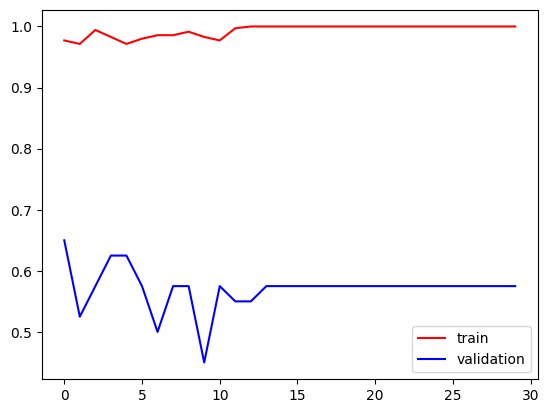

In [74]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

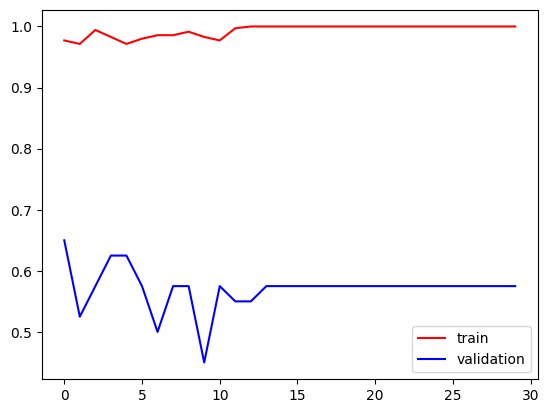

In [75]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

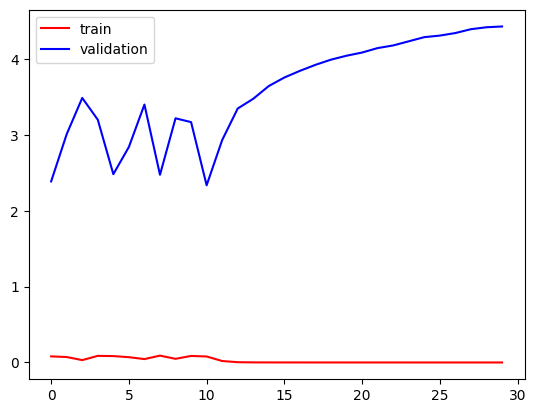

In [76]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [91]:
import cv2

In [98]:
test_img = cv2.imread('/content/data/PetImages/Cat/1.jpg')

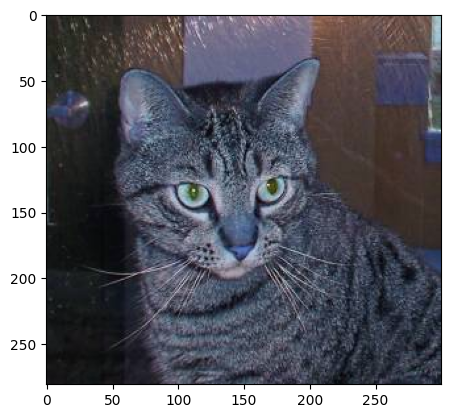

In [99]:
plt.imshow(test_img)

In [100]:
test_img.shape

(281, 300, 3)

In [101]:
test_img = cv2.resize(test_img,(150,150))

In [102]:
test_input = test_img.reshape((1,150,150,3))

In [103]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)